<a href="https://colab.research.google.com/github/RJthecoder/House-Price-Prediction-analytics/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df=pd.read_csv("/content/output.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df.date.dt.year
def encode(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

df['month'] = df.date.dt.month
df = encode(df, 'month', 12)

df['day'] = df.date.dt.day
df = encode(df, 'day', 31)

In [ ]:
df = df.astype({"bathrooms":'int', "bedrooms":'int', "floors":'int'})
numerical_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','month_sin','month_cos','day_sin','day_cos','yr_renovated','yr_built','sqft_basement','sqft_above']

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.2 MB/s eta 0:00:00


In [ ]:
object_cols = ['street', 'city', 'statezip', 'country']
low_cardinality_cols = [col for col in object_cols if df[col].nunique()<10]
high_cardinality_cols = list(set(object_cols) - set(low_cardinality_cols))
print('low',low_cardinality_cols, 'high',high_cardinality_cols)

#since other categorical cols have high cardinality we can use target encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()
df['encoded_statezip'] = encoder.fit_transform(df['statezip'], df['price'])
df['encoded_street'] = encoder.fit_transform(df['street'], df['price'])
df['encoded_city'] = encoder.fit_transform(df['city'], df['price'])
data = df.astype({"encoded_statezip":'int', "encoded_street":'int', "encoded_city":'int'})

#to check if target leakage (cuz it would cause extremly high corr)
print(df['price'].corr(df['encoded_street']))
categorical_cols = ['encoded_statezip','encoded_street','encoded_city']

low ['country'] high ['street', 'city', 'statezip']
0.9968155268037606


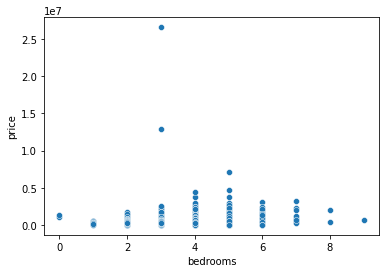

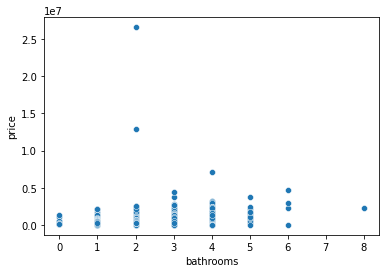

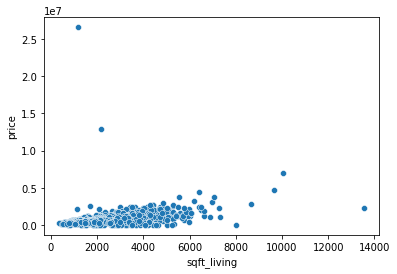

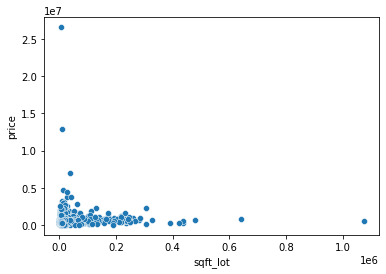

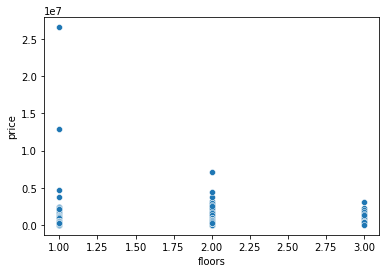

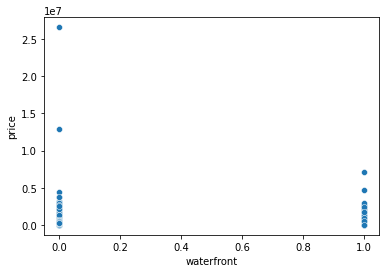

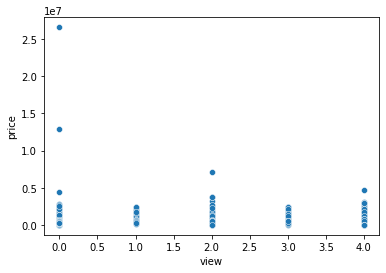

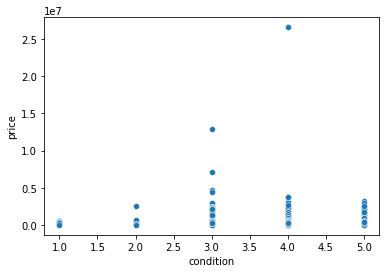

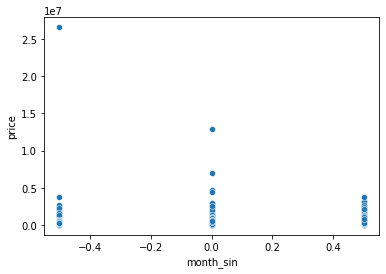

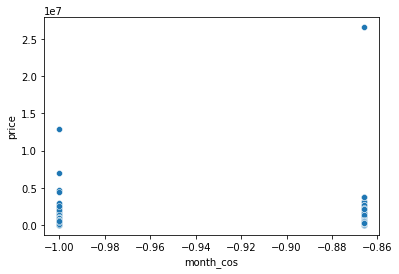

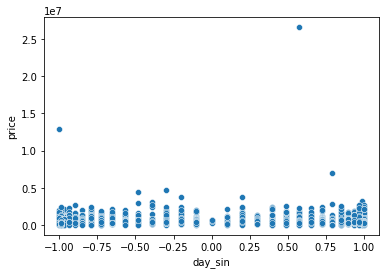

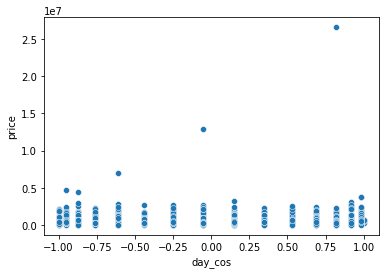

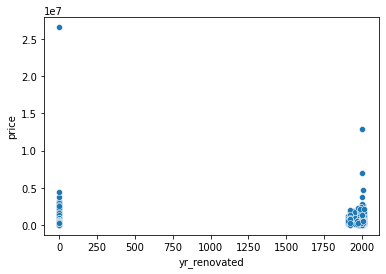

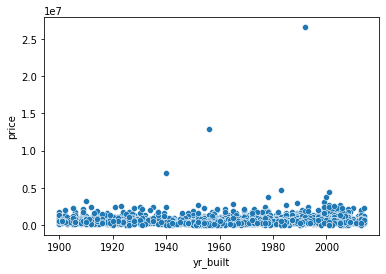

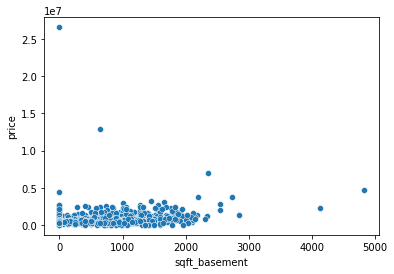

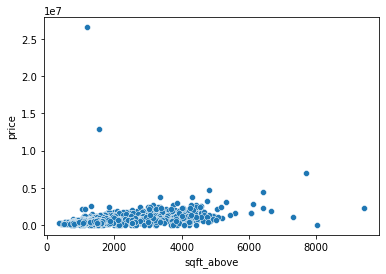

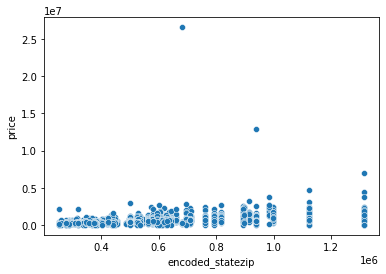

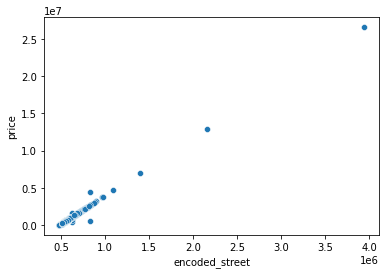

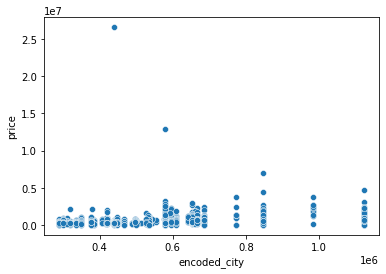

<Figure size 432x288 with 0 Axes>

In [ ]:
for col in numerical_cols:
    sns.scatterplot(x = df[col], y = df['price'])
    plt.figure()
for col in categorical_cols:
    sns.scatterplot(x = df[col], y = df['price'])
    plt.figure()

In [ ]:
numerical_transformer = SimpleImputer()
categorical_transformer =SimpleImputer()

preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

model = RandomForestRegressor(random_state = 0)
my_pipeline = Pipeline(steps = [('preprocessor', preprocessor),
                               ('model', model)])
features = np.concatenate([numerical_cols, categorical_cols])

X = data[features]
y = data.price
def MAEfinder(X,y):
    return -1*cross_val_score(my_pipeline, X, y, cv = 5, scoring= 'neg_mean_absolute_error')
print('Average MAE', MAEfinder(X,y).mean())

Average MAE 14044.046699602486


In [ ]:
xgbmodel = XGBRegressor(n_estimators = 500)
def MAEfinderXGB(X, y):
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
    xgbmodel.fit(train_X, train_y,
                early_stopping_rounds = 5,
                eval_set = [(val_X, val_y)],
                verbose = False)
    pred = xgbmodel.predict(val_X)
    return mean_absolute_error(pred, val_y)
print('MAE is',MAEfinderXGB(X, y))

MAE is 10429.132964910135


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


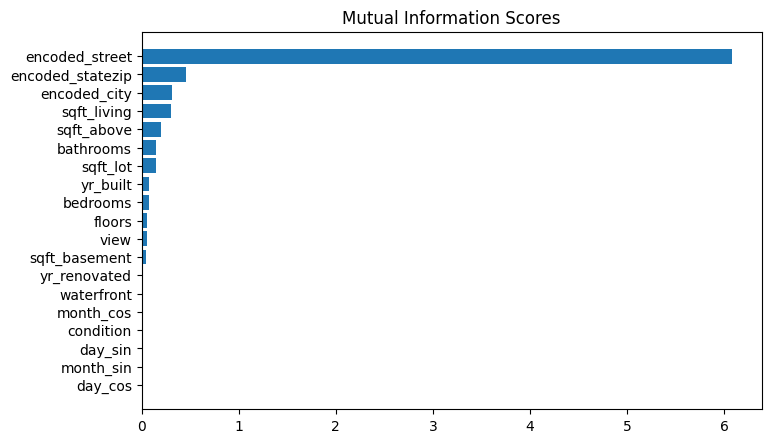

In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(make_mi_scores(X,y))

In [ ]:
X_new = X.copy()
X_new['total_sqft'] = X_new['sqft_basement']+ X_new['sqft_lot']+X_new['sqft_living']+ X_new['sqft_above']

print('Randomforestmodel MAE', MAEfinder(X_new, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y))
print(data['price'].corr(X_new['total_sqft']))

Randomforestmodel MAE 14044.046699602486
XGBRegressor MAE 10454.470021988927
0.07263446789679505


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


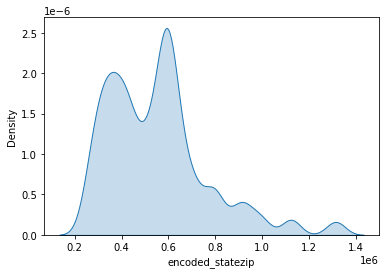

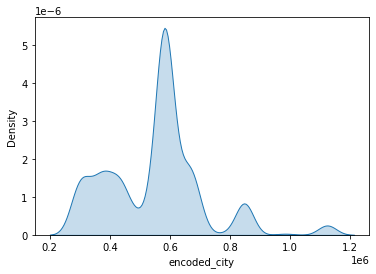

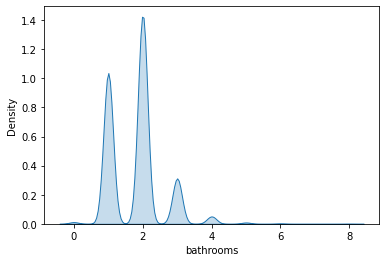

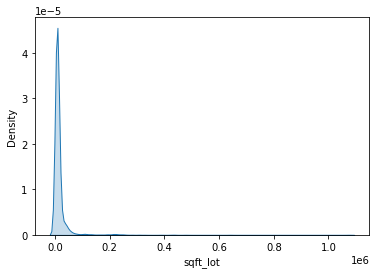

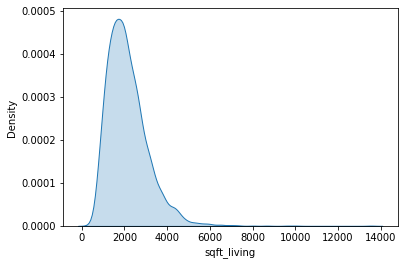

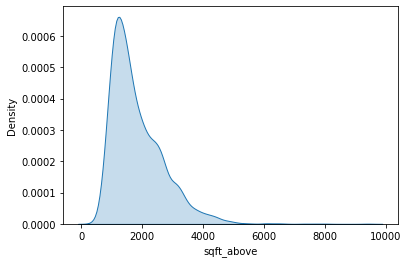

<Figure size 432x288 with 0 Axes>

In [ ]:
important_cols = ['encoded_statezip','encoded_city','bathrooms', 'sqft_lot','sqft_living', 'sqft_above']
for col in important_cols:
    sns.kdeplot(data = X[col], shade = True)
    plt.figure()

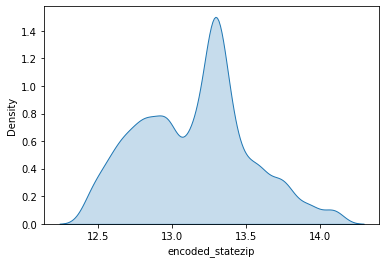

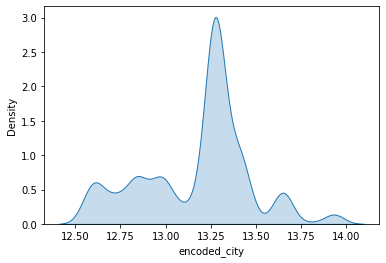

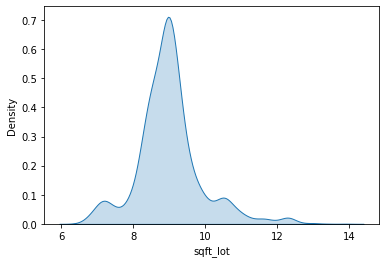

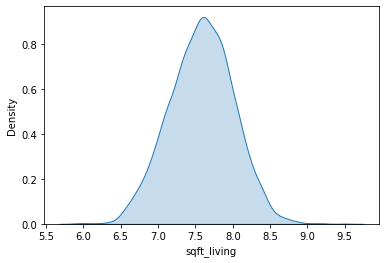

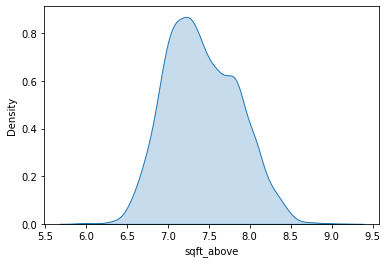

<Figure size 432x288 with 0 Axes>

In [ ]:
X_new = X.copy()
X_new['encoded_statezip'] = X_new['encoded_statezip'].apply(np.log1p)
X_new['encoded_city'] = X_new['encoded_city'].apply(np.log1p)
X_new['sqft_lot'] = X_new['sqft_lot'].apply(np.log1p)
X_new['sqft_living'] = X_new['sqft_living'].apply(np.log1p)
X_new['sqft_above'] = X_new['sqft_above'].apply(np.log1p)

important_cols = ['encoded_statezip','encoded_city','sqft_lot','sqft_living', 'sqft_above']
for col in important_cols:
    sns.kdeplot(data = X_new[col], shade = True)
    plt.figure()

In [ ]:
print('Randomforestmodel MAE', MAEfinder(X_new, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y))

Randomforestmodel MAE 14034.44405473771
XGBRegressor MAE 10429.132964910135


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

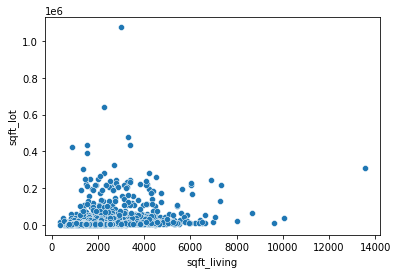

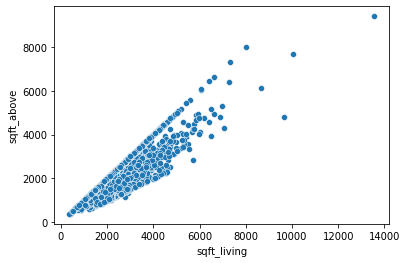

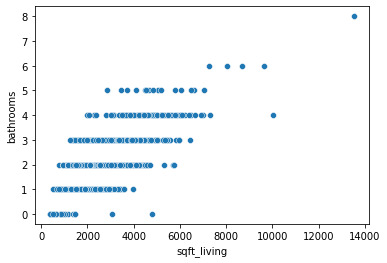

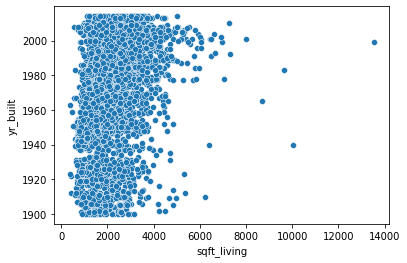

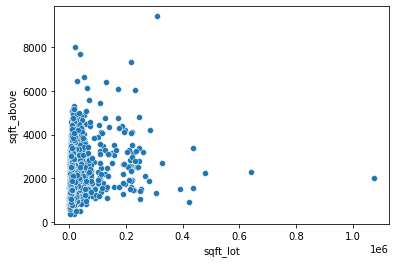

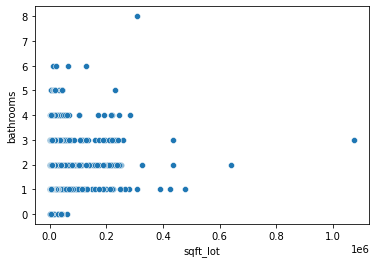

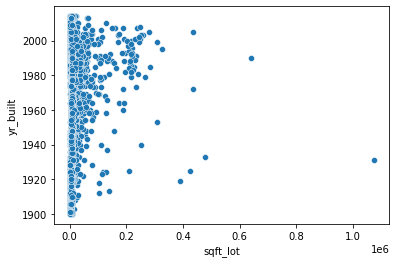

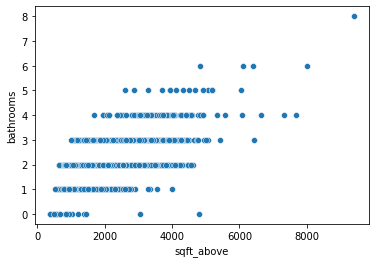

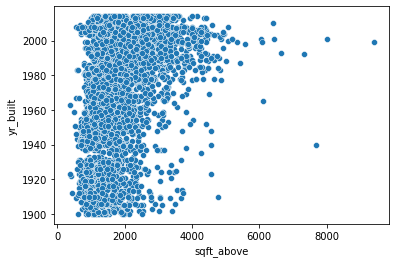

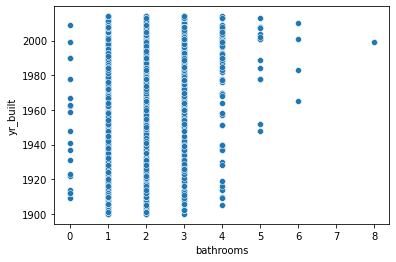

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.scatterplot(x = X['sqft_living'], y = X['sqft_lot'])
plt.figure()
sns.scatterplot(x = X['sqft_living'], y = X['sqft_above'])
plt.figure()
sns.scatterplot(x = X['sqft_living'], y = X['bathrooms'])
plt.figure()
sns.scatterplot(x = X['sqft_living'], y = X['yr_built'])
plt.figure()
sns.scatterplot(x = X['sqft_lot'], y = X['sqft_above'])
plt.figure()
sns.scatterplot(x = X['sqft_lot'], y = X['bathrooms'])
plt.figure()
sns.scatterplot(x = X['sqft_lot'], y = X['yr_built'])
plt.figure()
sns.scatterplot(x = X['sqft_above'], y = X['bathrooms'])
plt.figure()
sns.scatterplot(x = X['sqft_above'], y = X['yr_built'])
plt.figure()
sns.scatterplot(x = X['bathrooms'], y = X['yr_built'])
plt.figure()

In [ ]:
X_new = X.copy()
X_new = (X_new - X_new.mean(axis = 0))/X_new.std(axis = 0)

In [ ]:
print('Randomforestmodel MAE', MAEfinder(X_new, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y))

Randomforestmodel MAE 14031.763891663959
XGBRegressor MAE 10429.11666056231


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_new)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = component_names)
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.247710,-0.263433,0.323686,0.892069,-0.060008,1.718677,-0.896416,0.246035,-0.940945,0.419326,-0.116196,0.151982,-0.482044,0.613870,-0.189058,-0.093591,-0.004391,0.003919,0.001169
1,3.930422,3.407434,0.643870,0.472708,-0.049660,1.302045,2.213903,0.697685,-1.166730,2.718132,1.275158,-2.911531,-0.269948,2.091822,0.993195,0.195458,-0.381581,-0.231385,0.002229
2,-0.944993,-0.453097,0.696089,0.442764,-1.366410,0.958704,1.010294,0.492681,-1.054134,0.534301,-0.183912,0.132019,-0.612361,0.281353,-0.805014,-0.093612,0.753261,0.216790,0.001646
3,-0.266741,1.777190,-0.754736,0.783199,-1.473396,0.613981,0.886322,-0.076425,-1.122112,-1.540579,-0.134476,0.543392,-0.704037,-0.212623,-0.278908,-0.085082,0.319203,0.976462,-0.000544
4,-0.195679,1.562250,-0.114057,0.846490,-1.116978,1.014462,-0.699236,-0.224836,-1.131932,-0.513442,-0.423636,0.462242,-0.897785,-0.221842,0.643574,-0.918334,0.346970,-0.051669,-0.000030


In [ ]:
X_new2 = X.copy()
X_new2 = X_new2.join(X_pca)
print('Randomforestmodel MAE', MAEfinder(X_new2, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new2, y))

Randomforestmodel MAE 14044.046699602486


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor MAE 10376.759301102391


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

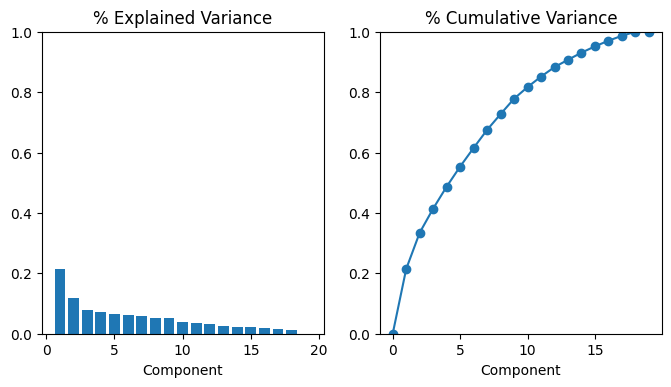

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca)

In [ ]:
loading = pd.DataFrame(
    pca.components_.T,
    columns = component_names,
    index = X.columns,
)
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
bedrooms,0.303715,0.062855,0.218313,-0.053179,-0.277850,-0.117911,-0.238068,-0.202154,-0.061968,0.133679,-0.358263,0.111577,0.183158,0.441868,0.522235,-0.002124,0.018424,-0.017088,0.000013
bathrooms,0.405530,-0.071769,0.102180,-0.008949,-0.078283,-0.032075,-0.031268,-0.109500,-0.071745,-0.045759,-0.005869,-0.032126,-0.191062,-0.393664,0.003415,0.240340,0.735101,-0.042624,0.000120
sqft_living,0.452097,0.063774,0.162208,-0.026874,-0.077393,-0.004307,-0.112588,0.012798,-0.005473,0.041516,-0.024272,-0.017168,0.013221,-0.042093,-0.412419,-0.047347,-0.276155,0.029327,-0.701158
sqft_lot,0.092978,-0.011633,0.236495,0.022139,-0.083484,0.056507,-0.091931,0.826780,0.336642,-0.248283,-0.008126,0.060712,-0.018885,-0.037614,0.220984,0.056558,0.003720,0.008811,-0.000053
floors,0.268312,-0.384870,-0.163416,0.019781,0.123750,0.017371,0.139553,-0.060812,-0.020892,0.092728,-0.022489,-0.265636,-0.201028,-0.309179,0.440488,0.258383,-0.454024,0.175960,-0.000505
waterfront,0.077349,0.136915,0.212133,-0.007871,0.523904,0.249993,0.374727,-0.058965,0.085489,0.051825,-0.446116,0.476286,-0.033497,-0.099944,0.017488,0.015960,-0.025699,-0.033851,-0.000014
view,0.162936,0.252178,0.296398,0.007183,0.367531,0.177945,0.237988,-0.038009,-0.017783,-0.129898,0.198228,-0.645682,0.094390,0.287758,0.105061,-0.087835,0.114969,-0.007328,0.000168
condition,-0.071182,0.343390,0.075561,-0.141933,-0.367545,-0.211302,0.415570,0.109961,-0.002184,0.327402,-0.163886,-0.183136,-0.194130,-0.308509,0.112384,-0.413573,-0.026328,-0.042528,0.000235
month_sin,-0.021750,0.009158,0.129891,0.740100,-0.077518,-0.077376,0.069525,0.000674,-0.087707,0.015535,-0.018984,0.040908,-0.575551,0.269602,-0.055113,0.014830,-0.019257,0.021278,0.000484
month_cos,0.004158,0.008289,-0.008938,0.496010,-0.331328,0.547051,0.115281,-0.035589,-0.055616,0.066810,-0.001430,-0.026017,0.507889,-0.247125,0.048201,-0.018052,-0.004070,-0.016893,-0.000341


In [ ]:
X_new = X_new2.copy()
X_new['size'] = X_new['bedrooms']*X_new['bathrooms']*X_new['sqft_living']*X_new['sqft_above']
print('Randomforestmodel MAE', MAEfinder(X_new, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y))

Randomforestmodel MAE 14044.046699602486


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor MAE 10201.881060188669


In [ ]:
X_new = X_new2.copy()
X_new['basementvsabove'] = X_new['sqft_basement']/X_new['sqft_above']
print('Randomforestmodel MAE', MAEfinder(X_new, y).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y))

Randomforestmodel MAE 14044.046699602486


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor MAE 10397.363145786494


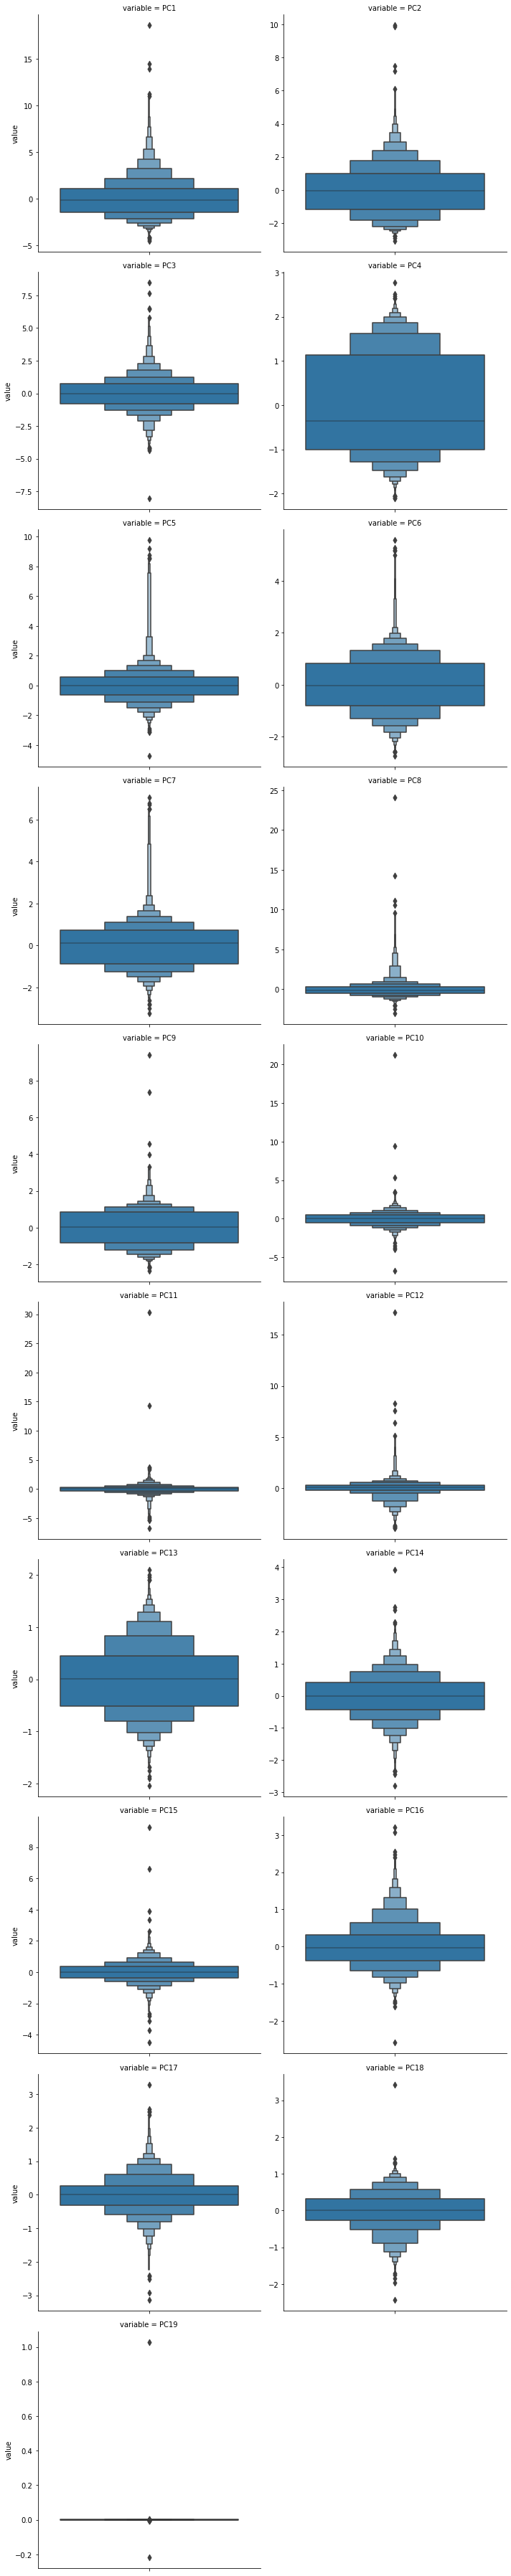

In [ ]:
sns.catplot(y = 'value', col = 'variable', data = X_pca.melt(),
           kind = 'boxen', sharey = False, col_wrap = 2,)

In [ ]:
component = 'PC1'
idx = X_pca[component].sort_values(ascending = False).index
X_new2.loc[idx]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,month_sin,month_cos,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
122,7,8,13540,307752,3,0,4,3,5.000000e-01,-0.866025,...,-2.585154,1.737325,-1.482139,-1.577490,-1.903986,-2.791549,1.660117,-1.512389,1.066408,-0.001346
2286,5,4,10040,37325,2,1,2,3,1.224647e-16,-1.000000,...,5.348603,0.980803,7.607174,-1.073941,-0.718110,-2.240193,0.479170,-2.419168,0.035792,-0.000506
2654,5,6,9640,13068,1,1,4,3,1.224647e-16,-1.000000,...,-1.340025,0.488086,6.367565,-0.772587,-2.787779,-1.857708,-0.195007,-0.563013,0.704771,-0.004537
4350,3,2,1180,7793,1,0,0,4,-5.000000e-01,-0.866025,...,21.214921,30.315082,17.205948,0.636087,3.921387,9.268448,-2.593403,3.284455,3.425905,-0.005452
2328,5,6,8670,64033,2,0,4,3,1.224647e-16,-1.000000,...,0.431944,3.139698,-1.796926,-1.153874,-0.922622,-2.072676,0.691401,0.318819,0.382623,-0.000243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,1,0,430,5050,1,0,0,2,5.000000e-01,-0.866025,...,-0.867618,0.717200,0.180400,1.071547,0.628784,-1.075644,2.032544,-0.648890,0.298978,-0.000390
3945,2,0,660,5240,1,0,0,4,-5.000000e-01,-0.866025,...,0.794177,-0.239511,-0.616073,0.886477,-0.629037,-0.044827,0.088257,-0.757507,0.146082,-0.000192
3778,1,0,370,1801,1,0,0,5,-5.000000e-01,-0.866025,...,0.310715,0.149456,-0.554117,0.919957,-0.964872,-0.314526,-0.137694,-0.613782,0.161141,-0.000541
2416,1,0,420,6720,1,0,0,3,1.224647e-16,-1.000000,...,-0.054096,0.673872,-0.249807,-0.397292,0.020536,-0.651730,0.340742,-0.467143,0.921801,-0.000027


In [ ]:
X_new = X_new2.drop([122,2654,2286], axis='index')
y_new = y.drop([122,2654,2286], axis = 'index')
print('Randomforestmodel MAE', MAEfinder(X_new, y_new).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y_new))

Randomforestmodel MAE 13476.75706095603


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor MAE 18429.56263638339


In [ ]:
component = 'PC2'
idx = X_pca[component].sort_values(ascending = False).index
X_new2.loc[idx]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,month_sin,month_cos,...,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
2654,5,6,9640,13068,1,1,4,3,1.224647e-16,-1.000000,...,-1.340025,0.488086,6.367565,-0.772587,-2.787779,-1.857708,-0.195007,-0.563013,0.704771,-0.004537
4350,3,2,1180,7793,1,0,0,4,-5.000000e-01,-0.866025,...,21.214921,30.315082,17.205948,0.636087,3.921387,9.268448,-2.593403,3.284455,3.425905,-0.005452
2286,5,4,10040,37325,2,1,2,3,1.224647e-16,-1.000000,...,5.348603,0.980803,7.607174,-1.073941,-0.718110,-2.240193,0.479170,-2.419168,0.035792,-0.000506
3791,3,2,3530,17450,1,1,3,3,-5.000000e-01,-0.866025,...,-0.776089,-2.969356,4.624468,0.989184,-1.179853,0.244419,0.219619,-0.414144,0.438709,-0.002172
2711,4,3,4100,22798,1,0,3,5,1.224647e-16,-1.000000,...,-0.188945,1.028818,-1.810413,-0.125341,-0.458777,0.089475,-1.008741,0.626238,0.551474,0.000130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,3,2,2238,7209,2,0,0,3,1.224647e-16,-1.000000,...,0.183443,0.589697,0.063287,0.188349,-0.306181,-0.319612,-0.011259,-0.162887,-0.231146,-0.000624
3127,3,3,1630,1677,3,0,0,3,1.224647e-16,-1.000000,...,-0.478761,0.111785,-0.405990,-0.412261,-1.319404,1.063891,0.683687,0.408111,0.886886,-0.001259
1360,5,4,4850,40902,2,0,0,3,5.000000e-01,-0.866025,...,1.453814,-0.719301,0.082594,0.027704,-0.099844,-1.387682,0.488508,0.656625,-0.101509,0.002330
360,3,2,2920,3942,3,0,0,3,5.000000e-01,-0.866025,...,0.921224,0.747466,-0.243888,-1.039625,-0.214600,-0.060643,0.350707,-1.217637,0.251870,-0.000900


In [ ]:
X_new = X_new2.drop([2607,122,2654,2286], axis='index')
y_new = y.drop([2607,122,2654,2286], axis = 'index')
print('Randomforestmodel MAE', MAEfinder(X_new, y_new).mean())
print('XGBRegressor MAE', MAEfinderXGB(X_new, y_new))

Randomforestmodel MAE 13485.099190243443


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor MAE 18221.64588342113
